## Preliminaries (imports)

In [5]:
from IPython.display import display, Markdown

import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ray.tune import Analysis

def printmd(text: str) -> None:
    display(Markdown(text))

In [6]:
import sys
sys.path.append('../src')

from config import config
from rendering import sampling

from experiment_analysis.experiment import Experiment
from experiment_analysis.parsing import load_experiments

config.set_data_dir("../data")

ray_dir = Path("../ray_results/")

# Tune trials analysis

In [7]:
trials = list(ray_dir.iterdir())
print("\n".join(str(t) for t in trials))

../ray_results/Trainable_2021-05-11_18-59-15
../ray_results/Trainable_2021-05-10_17-14-26
../ray_results/Trainable_2021-05-11_19-02-42


In [8]:
analysis = Analysis(ray_dir)

In [9]:
analysis_columns = ["accuracy", "mcc", "f1_score", "config/network", "config/lr", "config/objective_metric", "logdir"]
analysis_df = analysis.dataframe(metric="mcc", mode="max").loc[:, analysis_columns].sort_values("mcc", ascending=False)

printmd("### tune trials dataframe")
display(analysis_df)

### tune trials dataframe

,accuracy,mcc,f1_score,config/network,config/lr,config/objective_metric,logdir
9,0.647804,0.356858,0.652974,Hybrid,0.005638,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...
6,0.654561,0.345670,0.667526,Hybrid,0.009006,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...
3,0.626689,0.327411,0.667192,Hybrid,0.005211,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...
2,0.678209,0.325969,0.655215,Hybrid,0.010703,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...
0,0.723818,0.000000,0.607851,Hybrid,0.010761,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...
1,0.723818,0.000000,0.607851,Hybrid,0.009095,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...
4,0.010135,0.000000,0.000203,Hybrid,0.028873,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...
5,0.723818,0.000000,0.607851,Hybrid,0.012656,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...
7,0.723818,0.000000,0.607851,Hybrid,0.022197,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...
8,0.723818,0.000000,0.607851,Hybrid,0.019099,mcc,../ray_results/Trainable_2021-05-10_17-14-26/T...


In [10]:
best_experiment_dir = Path(analysis.get_best_logdir(metric="mcc", mode="max"))

printmd("### best trial logdir")
display(str(best_experiment_dir))

### best trial logdir

'../ray_results/Trainable_2021-05-10_17-14-26/Trainable_64fa08ee_8_batch_size=32,data_dir=_content_data,early_stop_count=3,early_stop_ratio=0.1,exp_name=tune_baseline,log_level_2021-05-11_00-28-08'

In [11]:
printmd("### best trial config")
display(analysis.get_best_config(metric="mcc", mode="max"))

### best trial config

{'batch_size': 32,
 'data_dir': '/content/data',
 'early_stop_count': 3,
 'early_stop_ratio': 0.1,
 'exp_name': 'tune_baseline',
 'log_level': 'INFO',
 'loss': {'function': 'focal_loss'},
 'lr': 0.005638147229923656,
 'model_params': '{"embedding_dim": 512, "hidden_layers": 3}',
 'network': 'Hybrid',
 'num_epochs': 10,
 'objective_metric': 'mcc',
 'seed': 0,
 'val_fraction': 0.2}

# Best trial anals

In [12]:
print(best_experiment_dir / "experiments")

../ray_results/Trainable_2021-05-10_17-14-26/Trainable_64fa08ee_8_batch_size=32,data_dir=_content_data,early_stop_count=3,early_stop_ratio=0.1,exp_name=tune_baseline,log_level_2021-05-11_00-28-08/experiments


In [13]:
best_experiment = Experiment(next((best_experiment_dir / "experiments").iterdir()))

In [21]:
best_experiment.train.reference.value_counts()

5    2753
4    1587
0     421
2       7
Name: reference, dtype: int64

In [15]:
printmd("### best experiment classification report")
printmd(best_experiment.classification_report("valid"))

### best experiment classification report

/home/soussi/repos/lesion-diagnosis/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/soussi/repos/lesion-diagnosis/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/soussi/repos/lesion-diagnosis/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

       akiec       0.23      0.81      0.36        37
         bcc       0.00      0.00      0.00        52
         bkl       0.00      0.00      0.00       113
          df       0.00      0.00      0.00        12
         mel       0.18      0.61      0.28        97
          nv       0.93      0.79      0.85       857
        vasc       0.00      0.00      0.00        16

    accuracy                           0.65      1184
   macro avg       0.19      0.32      0.21      1184
weighted avg       0.70      0.65      0.65      1184


In [17]:
printmd("### best experiment confusion matrix")
best_experiment.plot_confusion_matrix("valid", normalize="true")

### best experiment confusion matrix

ValueError: Shape of passed values is (7, 7), indices imply (3, 3)

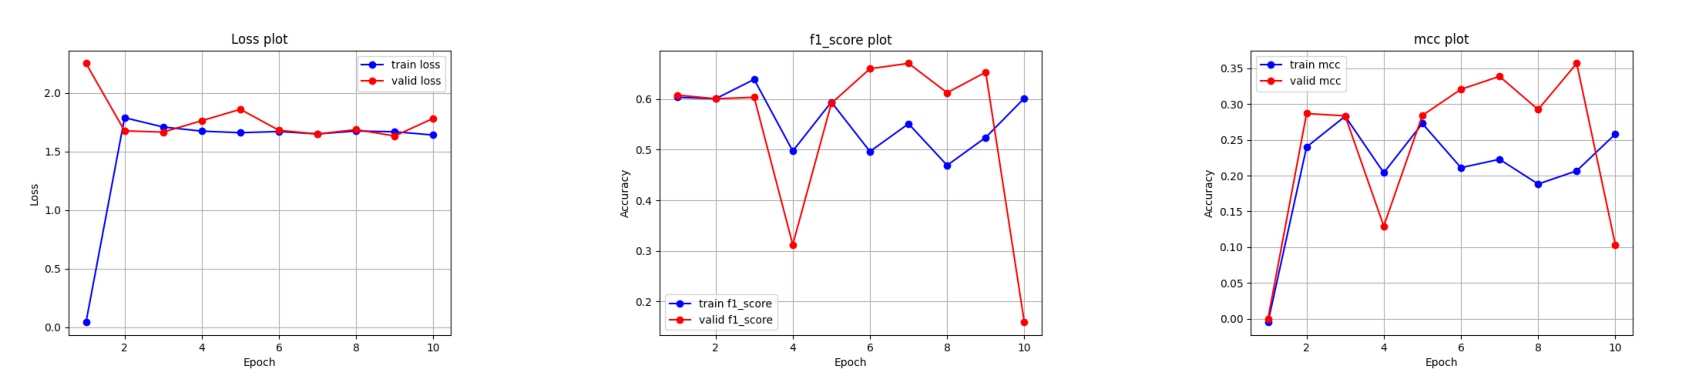

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 30))
plot_names = ["loss", "f1_score", "mcc"]
for ax, plot_name in zip(axes.flat, plot_names):
    best_experiment.display_plot(plot_name, ax=ax)
plt.show()